# Tales from the Crypto

## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi import NewsApiClient
analyzer = SentimentIntensityAnalyzer()
load_dotenv()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/lauren/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
api_key = os.getenv('NEWS_API_KEY')

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(q='Bitcoin',language='en',sort_by='relevancy')

# Print total articles
print(f"Total articles about Bitcoin: {btc_news['totalResults']}")

# Show sample article
btc_news["articles"][0]

Total articles about Bitcoin: 8618


{'source': {'id': 'cnn', 'name': 'CNN'},
 'author': None,
 'title': 'Is Bitcoin a safe bet?',
 'description': 'The digital cryptocurrency Bitcoin has tripled in value in the past three years. Will the boom only lead to a bigger bust?',
 'url': 'https://www.cnn.com/videos/business/2021/02/20/is-bitcoin-a-safe-bet-smerconish-vpx.cnn',
 'urlToImage': 'https://cdn.cnn.com/cnnnext/dam/assets/210220112649-smerconish-bitcoin-guests-split-super-tease.jpg',
 'publishedAt': '2021-02-20T17:12:04Z',
 'content': None}

In [5]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(q='Ethereum',language='en',sort_by='relevancy')

# Print total articles
print(f"Total articles about Bitcoin: {eth_news['totalResults']}")

# Show sample article
eth_news["articles"][0]

Total articles about Bitcoin: 2005


{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Jon Fingas',
 'title': 'NVIDIA limits RTX 3060 crypto speeds as it introduces mining cards',
 'description': "Worried that the GeForce RTX 3060 will be sold out as cryptocurrency miners snap up every GPU in sight? NVIDIA thinks it has a simple way to help: make the new card unattractive to the crypto crowd. The company has revealed that it's cutting the hash rate (mi…",
 'url': 'https://www.engadget.com/nvidia-limits-rtx-3060-for-crypto-mining-161657361.html',
 'urlToImage': 'https://s.yimg.com/uu/api/res/1.2/VLoRobjl1FcFEgV_0XjzqQ--~B/aD0xMDY3O3c9MTYwMDthcHBpZD15dGFjaHlvbg--/https://s.yimg.com/os/creatr-uploaded-images/2021-02/cad5ae60-7200-11eb-bbbc-25bd3507e406.cf.jpg',
 'publishedAt': '2021-02-18T16:16:57Z',
 'content': 'Worried that the GeForce RTX 3060 will be sold out as cryptocurrency miners snap up every GPU in sight? NVIDIA thinks it has a simple way to help: make the new card unattractive to the crypto crowd. … [

In [6]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = [] # creating empty list to store Ethereum sentiments data

for article in btc_news['articles']: # creating a loop to fetch specified data from each article
    try:
        text = article['content']
        date = article['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']

        btc_sentiments.append({
            'text':text,
            'date':date,
            'compoumd':compound,
            'positive':pos,
            'neutral':neu,
            'negative':neg


        })

    except AttributeError:
        pass


btc_df = pd.DataFrame(btc_sentiments)


In [7]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = [] # creating empty list to store Ethereum sentiments data

for article in eth_news['articles']: # creating a loop to fetch specified data from each article
    try:
        text = article['content']
        date = article['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']

        eth_sentiments.append({
            'text':text,
            'date':date,
            'compoumd':compound,
            'positive':pos,
            'neutral':neu,
            'negative':neg


        })

    except AttributeError:
        pass

eth_df = pd.DataFrame(eth_sentiments)
eth_df.head()

,text,date,compoumd,positive,neutral,negative
0,Worried that the GeForce RTX 3060 will be sold...,2021-02-18,-0.3400,0.063,0.818,0.119
1,NFTs are the latest cryptocurrency rage these ...,2021-03-06,-0.4588,0.066,0.789,0.145
2,NFTs (non-fungible tokens) — or scarce digital...,2021-02-27,0.4404,0.091,0.909,0.000
3,While the first Christie's auction of digital ...,2021-02-20,0.0258,0.030,0.970,0.000
4,Attempting to get ahead of cryptocurrency mine...,2021-02-18,0.7096,0.144,0.856,0.000


In [8]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compoumd,positive,neutral,negative
count,18.000000,18.000000,18.000000,18.000000
mean,0.249478,0.067111,0.868889,0.008444
std,0.341023,0.071077,0.227516,0.024663
min,-0.361200,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.856250,0.000000
50%,0.140300,0.055500,0.917500,0.000000
75%,0.559650,0.110000,0.989500,0.000000
max,0.831600,0.246000,1.000000,0.082000


In [9]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compoumd,positive,neutral,negative
count,20.000000,20.000000,20.000000,20.000000
mean,0.237070,0.074700,0.906100,0.019200
std,0.370410,0.062607,0.070778,0.043104
min,-0.458800,0.000000,0.754000,0.000000
25%,0.000000,0.022500,0.861750,0.000000
50%,0.307100,0.073500,0.915500,0.000000
75%,0.473275,0.096500,0.946750,0.000000
max,0.831600,0.246000,1.000000,0.145000


In [10]:
eth_df

,text,date,compoumd,positive,neutral,negative
0,Worried that the GeForce RTX 3060 will be sold...,2021-02-18,-0.3400,0.063,0.818,0.119
1,NFTs are the latest cryptocurrency rage these ...,2021-03-06,-0.4588,0.066,0.789,0.145
2,NFTs (non-fungible tokens) — or scarce digital...,2021-02-27,0.4404,0.091,0.909,0.000
3,While the first Christie's auction of digital ...,2021-02-20,0.0258,0.030,0.970,0.000
4,Attempting to get ahead of cryptocurrency mine...,2021-02-18,0.7096,0.144,0.856,0.000
5,"NEW YORK (Reuters) - Ethereum, the second larg...",2021-02-18,0.5719,0.139,0.861,0.000
6,"NEW YORK, Feb 18 (Reuters) - Ethereum, the sec...",2021-02-18,0.5719,0.135,0.865,0.000
7,Ethereum rose by 7.34% in the week ending 21st...,2021-02-22,0.0000,0.000,1.000,0.000
8,Some things are best left a mystery at least a...,2021-02-26,0.6369,0.113,0.887,0.000
9,Cryptocurrency exchange company Bitfinex is la...,2021-03-04,0.2960,0.090,0.862,0.048


### Questions:

Q: Which coin had the highest mean positive score?

A: *Ethereum had the highest mean positive score.*

Q: Which coin had the highest compound score?

A: *The highest compound score is tied for Ethereum and Bitcoin (0.831600). *

Q. Which coin had the highest positive score?

A: *Both Bitcoin and Ethereum's highest positive score is 0.246.*

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Create a tokenized list of the words
    sw = set(stopwords.words('english')) # Create a list of stopwords
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('',str(text))
    words = word_tokenize(re_clean)
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]    
    # Convert the words to lowercase
    # Remove the stop words
    tokens = [word.lower() for word in words if word.lower() not in sw]
    return tokens

In [14]:
# Create a new tokens column for Bitcoin
btc_df['tokens'] = btc_df.text.apply(tokenizer).astype('string')
btc_df.head()

,text,date,compoumd,positive,neutral,negative,tokens
0,Some things are best left a mystery at least a...,2021-02-26,0.6369,0.113,0.887,0.000,"['things', 'best', 'left', 'mystery', 'least',..."
1,,2021-03-03,0.0000,0.000,0.000,0.000,[]
2,"Bitcoin is the future, again: this morning, it...",2021-02-16,0.7041,0.140,0.860,0.000,"['bitcoin', 'future', 'morning', 'hit', 'allti..."
3,"Miamis mayor, Francis Suarez, is champing at t...",2021-02-12,0.1779,0.045,0.955,0.000,"['miamis', 'mayor', 'francis', 'suarez', 'cham..."
4,Jack Dorsey and Jay Z create a bitcoin endowme...,2021-02-12,-0.1280,0.066,0.852,0.082,"['jack', 'dorsey', 'jay', 'z', 'create', 'bitc..."


In [15]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = eth_df.text.apply(tokenizer).astype('string')
eth_df.head()

,text,date,compoumd,positive,neutral,negative,tokens
0,Worried that the GeForce RTX 3060 will be sold...,2021-02-18,-0.3400,0.063,0.818,0.119,"['worried', 'geforce', 'rtx', 'sold', 'cryptoc..."
1,NFTs are the latest cryptocurrency rage these ...,2021-03-06,-0.4588,0.066,0.789,0.145,"['nfts', 'latest', 'cryptocurrency', 'rage', '..."
2,NFTs (non-fungible tokens) — or scarce digital...,2021-02-27,0.4404,0.091,0.909,0.000,"['nfts', 'nonfungible', 'tokens', 'scarce', 'd..."
3,While the first Christie's auction of digital ...,2021-02-20,0.0258,0.030,0.970,0.000,"['first', 'christies', 'auction', 'digital', '..."
4,Attempting to get ahead of cryptocurrency mine...,2021-02-18,0.7096,0.144,0.856,0.000,"['attempting', 'get', 'ahead', 'cryptocurrency..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Generate the Bitcoin N-grams where N=2
btc_tokens = tokenizer(btc_df.text.str.cat())
bigram_btc_counts = Counter(ngrams(btc_tokens,n=2))
bigram_btc_counts

Counter({('things', 'best'): 1,
         ('best', 'left'): 1,
         ('left', 'mystery'): 1,
         ('mystery', 'least'): 1,
         ('least', 'far'): 1,
         ('far', 'coinbase'): 1,
         ('coinbase', 'concernedthe'): 1,
         ('concernedthe', 'san'): 1,
         ('san', 'franciscobased'): 1,
         ('franciscobased', 'cryptocurrency'): 1,
         ('cryptocurrency', 'exchange'): 2,
         ('exchange', 'preparing'): 1,
         ('preparing', 'go'): 1,
         ('go', 'public'): 1,
         ('public', 'since'): 1,
         ('since', 'last'): 1,
         ('last', 'year'): 1,
         ('year', 'thursday'): 1,
         ('thursday', 'pros'): 1,
         ('pros', 'charsbitcoin'): 1,
         ('charsbitcoin', 'future'): 1,
         ('future', 'morning'): 1,
         ('morning', 'hit'): 1,
         ('hit', 'alltime'): 1,
         ('alltime', 'high'): 2,
         ('high', 'value'): 1,
         ('value', 'lesson'): 1,
         ('lesson', 'elon'): 1,
         ('elon', 'musks')

In [18]:
# Generate the Ethereum N-grams where N=2
eth_tokens = tokenizer(eth_df.text.str.cat())
bigram_eth_counts = Counter(ngrams(eth_tokens,n=2))
bigram_eth_counts

Counter({('worried', 'geforce'): 1,
         ('geforce', 'rtx'): 1,
         ('rtx', 'sold'): 1,
         ('sold', 'cryptocurrency'): 1,
         ('cryptocurrency', 'miners'): 2,
         ('miners', 'snap'): 1,
         ('snap', 'every'): 1,
         ('every', 'gpu'): 1,
         ('gpu', 'sight'): 1,
         ('sight', 'nvidia'): 1,
         ('nvidia', 'thinks'): 1,
         ('thinks', 'simple'): 1,
         ('simple', 'way'): 1,
         ('way', 'help'): 1,
         ('help', 'make'): 1,
         ('make', 'new'): 1,
         ('new', 'card'): 1,
         ('card', 'unattractive'): 1,
         ('unattractive', 'crypto'): 1,
         ('crypto', 'crowd'): 1,
         ('crowd', 'charsnfts'): 1,
         ('charsnfts', 'latest'): 1,
         ('latest', 'cryptocurrency'): 1,
         ('cryptocurrency', 'rage'): 1,
         ('rage', 'days'): 1,
         ('days', 'bands'): 1,
         ('bands', 'like'): 1,
         ('like', 'kings'): 1,
         ('kings', 'leon'): 1,
         ('leon', 'releasing'

In [19]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Use token_count to get the top 10 words for Bitcoin
btc_top10 = token_count(bigram_btc_counts,10)
btc_top10

[(('charsby', 'reuters'), 4),
 (('cryptocurrency', 'exchange'), 2),
 (('alltime', 'high'), 2),
 (('investment', 'giveaway'), 2),
 (('reuters', 'stafffile'), 2),
 (('stafffile', 'photo'), 2),
 (('virtual', 'currency'), 2),
 (('illustration', 'taken'), 2),
 (('things', 'best'), 1),
 (('best', 'left'), 1)]

In [21]:
# Use token_count to get the top 10 words for Ethereum
eth_top10 = token_count(bigram_eth_counts,10)
eth_top10

[(('charsby', 'reuters'), 6),
 (('record', 'high'), 3),
 (('feb', 'reuters'), 3),
 (('reuters', 'staffsingapore'), 3),
 (('cryptocurrency', 'miners'), 2),
 (('charsnew', 'york'), 2),
 (('reuters', 'ethereum'), 2),
 (('ethereum', 'second'), 2),
 (('second', 'largest'), 2),
 (('largest', 'cryptocurrency'), 2)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

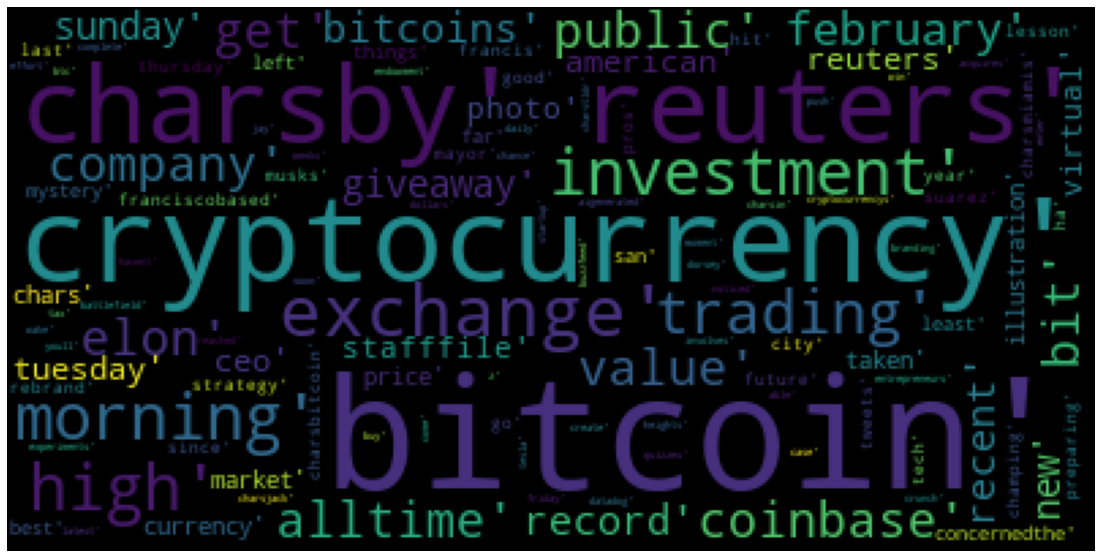

In [23]:
# Generate the Bitcoin word cloud
btc_cloud = WordCloud(background_color='black').generate(str(btc_tokens))
plt.axis('off')
plt.imshow(btc_cloud)

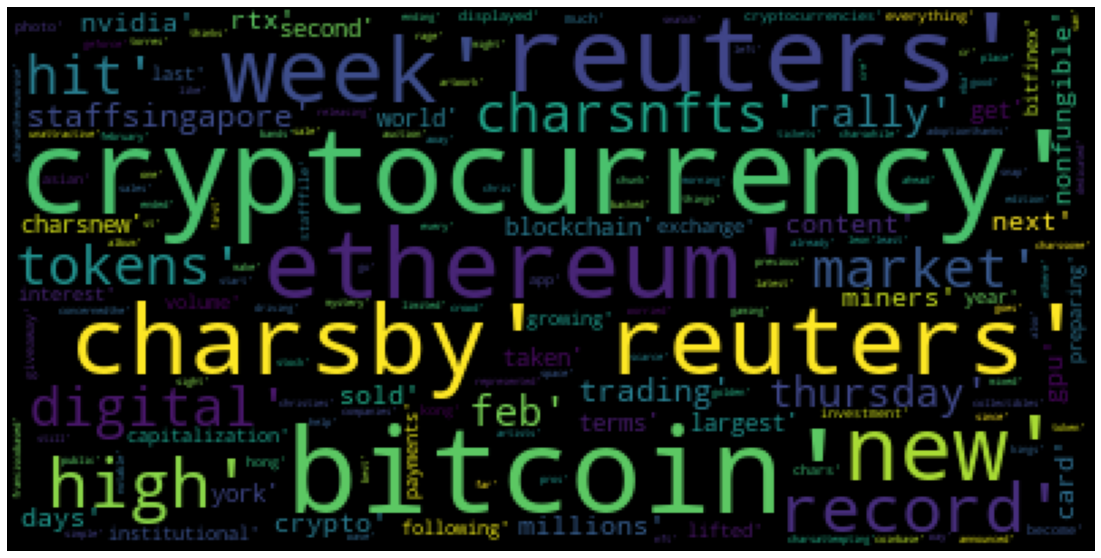

In [24]:
# Generate the Ethereum word cloud
eth_cloud = WordCloud(background_color='black').generate(str(eth_tokens))
plt.axis('off')
plt.imshow(eth_cloud)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [25]:
import spacy
from spacy import displacy

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
all_btc_text = btc_df.text.str.cat()
all_btc_text

'Some things are best left a mystery at least as far as Coinbase is concerned.\xa0\r\nThe San Francisco-based cryptocurrency exchange has been preparing to go public since last year, and in a Thursday pros… [+1953 chars]Bitcoin is the future, again: this morning, it hit an all-time high value of over $50,000. Is there a lesson in here? Are Elon Musks tweets a good investment strategy? Should we get in on this? We ha… [+3198 chars]Miamis mayor, Francis Suarez, is champing at the bit to rebrand his city as a haven for tech entrepreneurs and the tax dollars that come in their wake. His latest branding effort involves a push to m… [+2454 chars]Jack Dorsey and Jay Z create a bitcoin endowment, Datadog acquires a Startup Battlefield company and BuzzFeed experiments with AI-generated quizzes. This is your Daily Crunch for February 12, 2021.\r\n… [+2805 chars]In case you havent noticed, Bitcoins having a bit of a moment. The cryptocurrencys value reached record heights in recent weeks, youll s

In [28]:
# Run the NER processor on all of the text
btc_doc = nlp(all_btc_text)

# Add a title to the document
btc_doc.user_data['title'] = 'Bitcoin NER'

In [29]:
# Render the visualization
displacy.render(btc_doc,style='ent')

In [30]:
# List all Entities
for i in btc_doc.ents:
    print(i.text,i.label_)

Coinbase NORP
San Francisco GPE
last year DATE
Thursday DATE
this morning TIME
over $50,000 MONEY
Francis Suarez PERSON
Dorsey PERSON
Jay Z PERSON
Datadog ORG
Startup Battlefield ORG
BuzzFeed ORG
AI ORG
Daily Crunch WORK_OF_ART
February 12, 2021 DATE
Bitcoins PERSON
recent weeks DATE
Friday DATE
over $12,000 MONEY
CNN ORG
above $58,000 MONEY
Sunday DATE
just above $46,000 MONEY
Tuesday DATE
chars]Blockchain.com ORG
$120 million MONEY
Moore Strategic Ventu PERSON
chars]This morning TIME
Coinbase WORK_OF_ART
American NORP
19, 2021 DATE
Elon Musk PERSON
Binance GPE
Changp GPE
Reuters ORG
Dec. 8, 2017 DATE
Benoit Tessier/Illustration ORG
Reuters ORG
Reuters ORG
Bitcoin PERSON
January 21, 2021 DATE
Reuters ORG
Reuters ORG
Feb 21 DATE
Reuters ORG
Sunday DATE
two-month DATE
$1 trillion MONEY
Friday DATE
Reuters ORG
Pristina GPE
Kosovo GPE
June 12, 2018 DATE
HONG KONG GPE
Reuters Breakingviews ORG
Feb. 19, 2021 DATE
Evolve WORK_OF_ART
week of February DATE
North American NORP
7 CARDINAL
one CA

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
all_eth_text = eth_df.text.str.cat()
all_eth_text

'Worried that the GeForce RTX 3060 will be sold out as cryptocurrency miners snap up every GPU in sight? NVIDIA thinks it has a simple way to help: make the new card unattractive to the crypto crowd. … [+1652 chars]NFTs are the latest cryptocurrency rage these days, with bands like Kings of Leon releasing their next album as limited edition "golden tickets," and NBA digital collectibles being sold for millions … [+7287 chars]NFTs (non-fungible tokens) — or scarce digital content represented as tokens — are driving a new wave of crypto adoption.\r\nThanks to the Ethereum blockchain, artists, gaming companies and content cre… [+5365 chars]While the first Christie\'s auction of digital artwork backed by NFT (non-fungible token) is still a few days away, one of the most notable sales in that world has already taken place. Chris Torres cr… [+1064 chars]Attempting to get ahead of cryptocurrency miners who might snatch up a good chunk of RTX 3060 stock when the GPU goes on sale next week, Nvi

In [32]:
# Run the NER processor on all of the text
eth_doc = nlp(all_eth_text)

# Add a title to the document
eth_doc.user_data['title'] = 'Ethereum NER'

In [33]:
# Render the visualization
displacy.render(eth_doc,style='ent')

In [34]:
# List all Entities
for i in eth_doc.ents:
    print(i.text,i.label_)

GeForce ORG
3060 GPE
GPU ORG
these days DATE
Kings PERSON
NBA ORG
millions CARDINAL
Ethereum ORG
first ORDINAL
Christie's ORG
NFT ORG
a few days DATE
Chris Torres PERSON
3060 DATE
GPU ORG
next week DATE
Nvidia PERSON
this morning TIME
chars]NEW YORK GPE
Reuters ORG
second ORDINAL
Thursday DATE
chars]NEW YORK GPE
Feb 18 DATE
Reuters ORG
second ORDINAL
Thursday DATE
7.34% PERCENT
the week ending 21st February DATE
11.65% PERCENT
the previous week DATE
Ethereum ended ORG
the week DATE
1,935.57 MONEY
the week DATE
Coinbase NORP
San Francisco GPE
last year DATE
Thursday DATE
Bitfinex ORG
Bitfinex ORG
millions of dollars MONEY
Reuters ORG
SINGAPORE PERSON
Reuters ORG
Asian NORP
Saturday DATE
two-month DATE
$1 trillion MONEY
a day earlier DATE
World FX ORG
Kevin Buckland PERSON
Reuters ORG
Meitu ORG
Hong Kong GPE
China GPE
March 24, 2017 DATE
Bobby Yip PERSON
HONG KONG GPE
Reuters ORG
Hong Ko PERSON
Reuters ORG
SINGAPORE GPE
Feb 15 DATE
Reuters ORG
Asian NORP
Monday DATE
more than 5% PERCENT


---